In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.layers import Dropout, BatchNormalization
from keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
cd /content/gdrive/Shareddrives//deep_learning

/content/gdrive/Shareddrives/deep_learning


In [ ]:
path_dir1 = './train/rock/'
path_dir2 = './train/paper/'
path_dir3 = './train/scissors/'
file_list1 = os.listdir(path_dir1) # path에 존재하는 파일 목록 가져오기
file_list2 = os.listdir(path_dir2)
file_list3 = os.listdir(path_dir3)

In [ ]:
# create the base pre-trained model
IMG_SHAPE = (224, 224, 3)
 
base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=IMG_SHAPE)

219070464/219055592 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers[:]:
    layer.trainable = False
    
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed_5b
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 conv2d_12
51 conv2d_14
52 conv2d_17
53 batch_normalization_12
54 batch_normalization_14
55 batch_normalization_17
56 activa

In [ ]:
#keras tuner : hyperparmeter tuning
#kernal initalizer도 여러가지 할 수 있음. (모델이 깊을 때는 )

classes = 3
x = base_model.get_layer(index=779).output

x = Flatten()(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu',  kernel_initializer='he_normal', bias_initializer='zeros')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
predictions = Dense(classes, activation='softmax')(x)

my_model = Model(inputs=base_model.input, outputs=predictions)

my_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
path_dir = "./train"
temp = os.listdir(path_dir)
len(temp)
for i in temp :
  print(i, len(os.listdir(path_dir+"/"+i)))

rock 5014
scissors 5132
paper 5029


In [ ]:
targetx = 224
targety = 224

#making the instance of 'ImageDataGenerator' 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split = 0.2)
val_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split = 0.2)

#val_datagen = ImageDataGenerator(rescale=1./255)

# setting the path of datasets
train_dir = os.getcwd()+"/train/"

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    subset = 'training',
                                                    batch_size=32, 
                                                    target_size=(targetx, targety),
                                                    shuffle=True,
                                                    class_mode='categorical')

val_generator = train_datagen.flow_from_directory(train_dir,
                                                 subset = 'validation',
                                                batch_size=32, 
                                                target_size=(targetx, targety),
                                                shuffle=True,
                                                class_mode='categorical')

Found 12139 images belonging to 3 classes.
Found 3032 images belonging to 3 classes.


In [ ]:
model = load_model(checkpoint_dir+"recent_model_resnetv2_1203_0100.h5")


NameError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
380/380 [==============================] - 4541s 12s/step - loss: 0.5126 - accuracy: 0.8526 - val_loss: 0.6739 - val_accuracy: 0.8186
Epoch 2/20
380/380 [==============================] - 365s 960ms/step - loss: 0.2480 - accuracy: 0.9158 - val_loss: 0.5594 - val_accuracy: 0.8519
Epoch 3/20
380/380 [==============================] - 369s 971ms/step - loss: 0.2144 - accuracy: 0.9237 - val_loss: 0.5073 - val_accuracy: 0.8555
Epoch 4/20
380/380 [==============================] - 368s 968ms/step - loss: 0.1882 - accuracy: 0.9338 - val_loss: 0.4339 - val_accuracy: 0.8701
Epoch 5/20
380/380 [==============================] - 358s 941ms/step - loss: 0.1627 - accuracy: 0.9418 - val_loss: 0.5672 - val_accuracy: 0.8499
Epoch 6/20
380/380 [==============================] - 354s 931ms/step - loss: 0.1409 - accuracy: 0.9493 - val_loss: 0.5000 - val_accuracy: 0.8559
Epoch 7/20
380/380 [==============================] - 354s 932ms/step - loss: 0.1462 - accuracy: 0.9529 - val_loss: 0.4584 - 

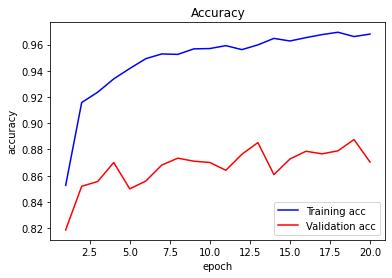

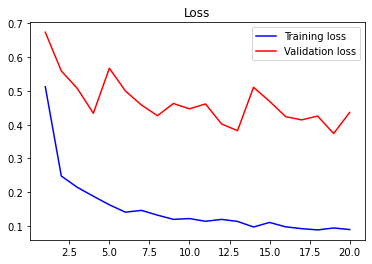

In [ ]:
#setting ModelCheckpoint
checkpoint_dir = os.getcwd()+"/model/"
os.makedirs(checkpoint_dir, exist_ok=True)
epochs = 20
#compiling
optimizer = Adam(learning_rate=0.0001)
loss = "categorical_crossentropy"

my_model.compile(optimizer=optimizer,
              loss=loss,
              metrics=["accuracy"])

callbacks = [EarlyStopping(monitor='val_loss',
                                           patience=10),
             ModelCheckpoint(filepath=checkpoint_dir+"/"+'recent_model_resnetv2_Flatten_0.2.h5',
                                             monitor='val_loss',
                                             save_best_only=True)]


#keras_model_best = keras.models.load_model('best_model.h5')

#training
history = my_model.fit_generator(train_generator,
                                 steps_per_epoch=len(train_generator),
                                 epochs=epochs,
                                 validation_data=val_generator, 
                                 validation_steps=len(val_generator),
                                 callbacks=callbacks) #early stopping 집어넣기
#visualizing
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
print('hah')

hah


In [ ]:
my_model.save('batch32_0.2_FLATTEN_v2.h5')